### ---

# Universidad de Costa Rica

### Facultad de Ingeniería

### Escuela de Ingeniería Eléctrica

#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

---

# Tarea de programación 4:

*Estudiante:* **Laura Rojas**

*Carnet:* **B76798**

*Correo electrónico:* **laura.rojaszumbado@ucr.ac.cr**

---

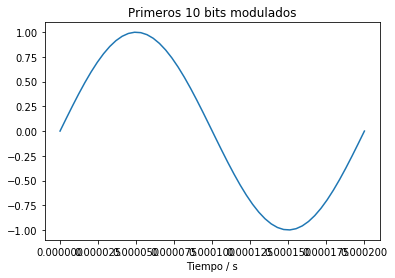

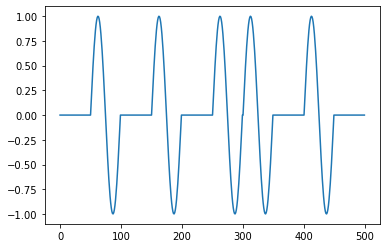

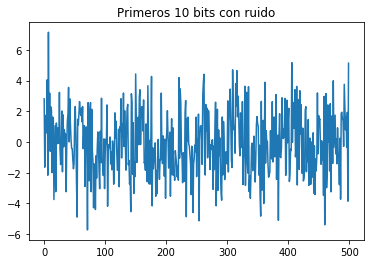

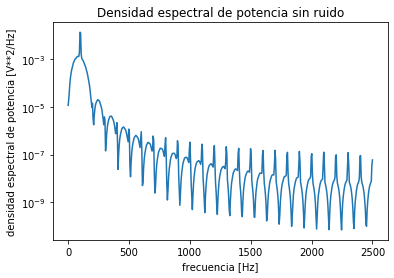

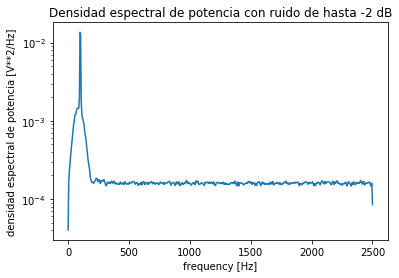

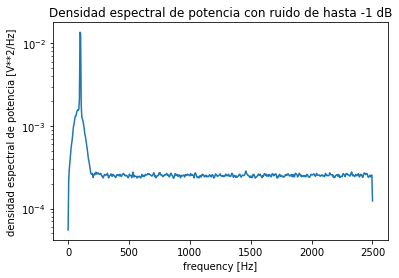

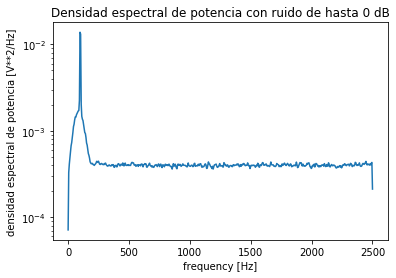

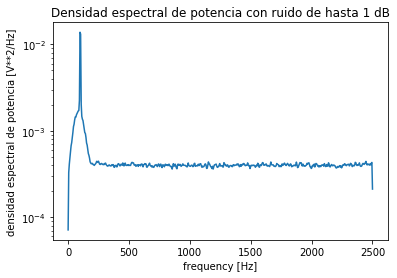

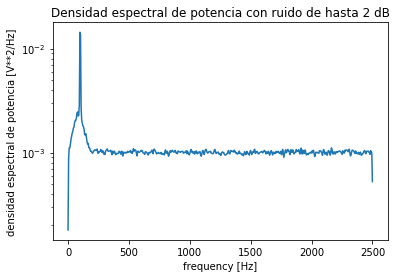

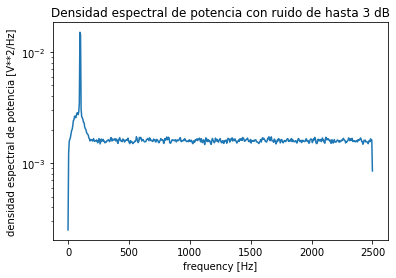

0.1052


'\nPunto 6: Graficar BER versus SNR\nBER -> y\nSNR -> x\n'

In [68]:
import numpy as np
from scipy import stats
from scipy import signal
import matplotlib.pyplot as plt
import math

'''
Punto 1: Esquema de modulación BPSK
'''

#Obtener los bits, lectura de archivo .csv. Estos bits se van a "transmitir"
#leer datos del archivo csv
bits = np.loadtxt("bits10k.csv", delimiter=',')

#obtener cantidad de datos N basasdo en la longitud de bits
N = bits.size

###
#Modulación OOK (on-off keying)

#(Decisiones determinadas en clase):
# f = 1000 Hz
#Cada símbolo es un período completo de una señal sinusoidal
###

# Frecuencia de operación, según enunciado
f = 5000 # 5 kHz

# Duración del período de cada onda
T = 1/f # 1 ms

# Número de puntos de muestreo por período
p = 50 

# Puntos de muestreo para cada período
tp = np.linspace(0, T, p)

# Creación de la forma de onda
seno = np.sin(2*np.pi * f * tp)

# Visualización de la forma de onda de la portadora
plt.title('Forma de onda sinusoidal normalizada')
plt.plot(tp, seno)
plt.xlabel('Tiempo / s')
#plt.savefig('onda.png')

# Frecuencia de muestreo
fs = p/T # 50 kHz

# Creación de la línea temporal para toda la señal Tx
t = np.linspace(0, N*T, N*p)

# Inicializar señal como un arreglo de ceros
senal = np.zeros(N*p)

# Creación de la señal modulada OOK
for k, b in enumerate(bits):
    senal[k*p:(k+1)*p] = b * seno

# Visualización de los primeros pb=10 bits modulados
pb = 10
plt.title('Primeros 10 bits modulados')
plt.figure()
plt.plot(senal[0:pb*p])
#plt.savefig('Tx.png')

'''
Punto 2: Cálculo de Potencia Promedio de la Señal
'''
#utilizano la definición "sum squared magnitude" se define la potencia promedio como la suma de los cuadrados de todos los puntos en la señal
Psenal = sum(senal**2)

'''
Punto 3: Simular un canal ruidoso del tipo AWGN (ruido aditivo blanco gaussiano) con una relación señal a ruido (SNR) desde -2 hasta 3 dB.
'''
#convertir límites de db a unidades normales
lower_db = -2
lowerLimit = 10**(lower_db/10)
upper_db = 3
upperLimit = 10**(upper_db/10)

#crear los arreglos 
ruido = []

#rango (-2 a 3)
for x in range(-2,3+1):
    noise = np.random.normal(0, 10**(x/10), senal.shape)
    ruido.append(noise)
    
# Señal recibida = señal regular + el ruido correspondiente
Rx_n2 = senal + ruido[0]
Rx_n1 = senal + ruido[1]
Rx_0 = senal + ruido[2]
Rx_1 = senal + ruido[3]
Rx_2 = senal + ruido[4]
Rx_3 = senal + ruido[5]


# Visualización de los primeros pb = 10 bits recibidos
pb = 10
plt.figure()
plt.title('Primeros 10 bits con ruido')
plt.plot(Rx[0:pb*p])
#plt.savefig('Rx.png')

'''
Punto 4: Graficar la densidad espectral de potencia de la señal con el método de Welch (SciPy), antes y después del canal ruidoso.
'''

# Graficar DSP sin el ruido
frequency1, Pxx_1 = signal.welch(senal, f, nperseg=1024)
plt.figure()
plt.semilogy(frequency1, Pxx_1)
#plt.ylim([0.5e-3, 1])
plt.title('Densidad espectral de potencia sin ruido')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('densidad espectral de potencia [V**2/Hz]')
plt.savefig('DSPsinruido.png')
plt.show()

# Graficar DSP con el ruido de -2 dB
frequency2, Pxx_2 = signal.welch(Rx_n2, f, nperseg=1024)
plt.figure()
plt.semilogy(frequency2, Pxx_2)
#plt.ylim([0.5e-3, 1])
plt.title('Densidad espectral de potencia con ruido de hasta -2 dB')
plt.xlabel('frequency [Hz]')
plt.ylabel('densidad espectral de potencia [V**2/Hz]')
plt.savefig('DSPconruido-2db.png')
plt.show()

# Graficar DSP con el ruido de -1 dB
frequency3, Pxx_3 = signal.welch(Rx_n1, f, nperseg=1024)
plt.figure()
plt.semilogy(frequency3, Pxx_3)
#plt.ylim([0.5e-3, 1])
plt.title('Densidad espectral de potencia con ruido de hasta -1 dB')
plt.xlabel('frequency [Hz]')
plt.ylabel('densidad espectral de potencia [V**2/Hz]')
plt.savefig('DSPconruido-1db.png')
plt.show()

# Graficar DSP con el ruido de 0dB
frequency4, Pxx_4 = signal.welch(Rx_0, f, nperseg=1024)
plt.figure()
plt.semilogy(frequency4, Pxx_4)
#plt.ylim([0.5e-3, 1])
plt.title('Densidad espectral de potencia con ruido de hasta 0 dB')
plt.xlabel('frequency [Hz]')
plt.ylabel('densidad espectral de potencia [V**2/Hz]')
plt.savefig('DSPconruido0db.png')
plt.show()

# Graficar DSP con el ruido de 1 dB
frequency5, Pxx_5 = signal.welch(Rx_1, f, nperseg=1024)
plt.figure()
plt.semilogy(frequency4, Pxx_4)
#plt.ylim([0.5e-3, 1])
plt.title('Densidad espectral de potencia con ruido de hasta 1 dB')
plt.xlabel('frequency [Hz]')
plt.ylabel('densidad espectral de potencia [V**2/Hz]')
plt.savefig('DSPconruido1db.png')
plt.show()

# Graficar DSP con el ruido de 2 dB
frequency6, Pxx_6 = signal.welch(Rx_2, f, nperseg=1024)
plt.figure()
plt.semilogy(frequency6, Pxx_6)
#plt.ylim([0.5e-3, 1])
plt.title('Densidad espectral de potencia con ruido de hasta 2 dB')
plt.xlabel('frequency [Hz]')
plt.ylabel('densidad espectral de potencia [V**2/Hz]')
plt.savefig('DSPconruido2db.png')
plt.show()

# Graficar DSP con el ruido de 3 dB
frequency7, Pxx_7 = signal.welch(Rx_3, f, nperseg=1024)
plt.figure()
plt.semilogy(frequency7, Pxx_7)
#plt.ylim([0.5e-3, 1])
plt.title('Densidad espectral de potencia con ruido de hasta 3 dB')
plt.xlabel('frequency [Hz]')
plt.ylabel('densidad espectral de potencia [V**2/Hz]')
plt.savefig('DSPconruido3db.png')
plt.show()

'''
Punto 5: Demodular y decodificar la señal y hacer un conteo de la tasa de error de bits (BER, bit error rate) para cada nivel SNR.
'''
# Pseudo-energía de la onda original (una onda)
Es = np.sum(seno**2)

# Inicialización del vector de bits recibidos
bitsRx = np.zeros(bits.shape)

# Decodificación de la señal por detección de energía
for k in range(len(bitsRx)):
    E = np.sum(Rx[k*p:(k+1)*p] * seno)
    if E > Es/2:
        bitsRx[k] = 1
    else:
        bitsRx[k] = 0

# Contar errores
err = np.sum(np.abs(bits - bitsRx))

# Tasa de error de bits (BER, bit error rate)
BER = err/N
print(BER)

'''
Punto 6: Graficar BER versus SNR
BER -> y
SNR -> x
'''